# Factor analysis to 🏨 hotel satisfaction score dataset

In [23]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")
library(skimr)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "europe-hotel-satisfaction-score"

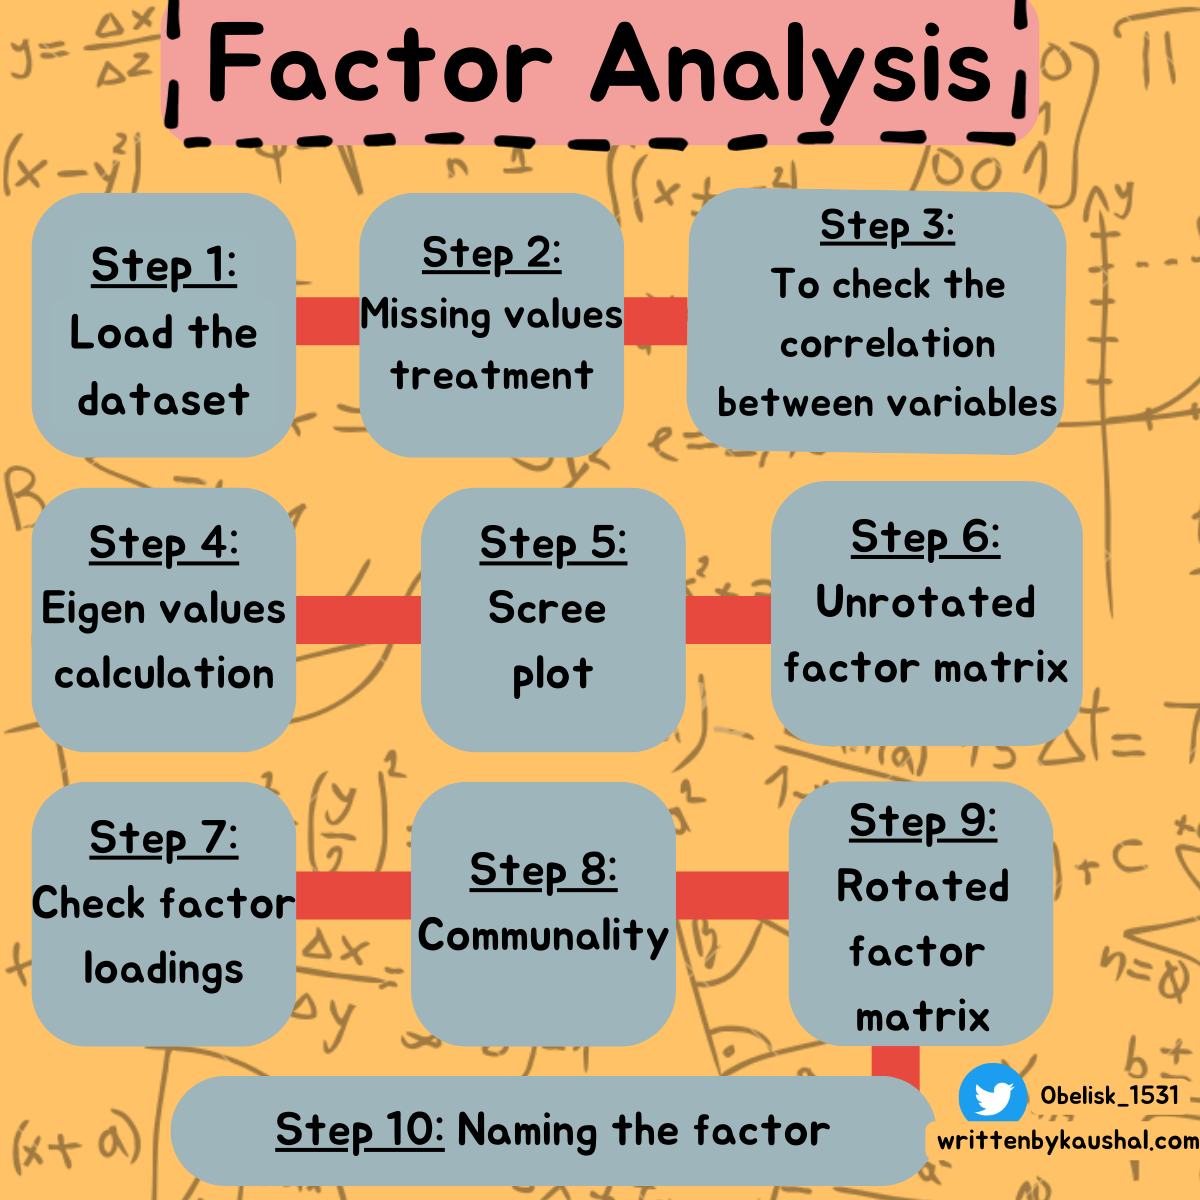

### Step 1: Read and understand dataset

In [24]:
hotel_data <- read.csv('../input/europe-hotel-satisfaction-score/Europe Hotel Booking Satisfaction Score.csv')

In [25]:
str(hotel_data)

'data.frame':	103904 obs. of  17 variables:
 $ id                            : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                        : chr  "Male" "Male" "Female" "Female" ...
 $ Age                           : int  13 25 26 25 61 26 47 52 41 20 ...
 $ purpose_of_travel             : chr  "aviation" "tourism" "tourism" "tourism" ...
 $ Type.of.Travel                : chr  "Personal Travel" "Group Travel" "Group Travel" "Group Travel" ...
 $ Type.Of.Booking               : chr  "Not defined" "Group bookings" "Group bookings" "Group bookings" ...
 $ Hotel.wifi.service            : int  3 3 2 2 3 3 2 4 1 3 ...
 $ Departure.Arrival..convenience: int  4 2 2 5 3 4 4 3 2 3 ...
 $ Ease.of.Online.booking        : int  3 3 2 5 3 2 2 4 2 3 ...
 $ Hotel.location                : int  1 3 2 5 3 1 3 4 2 4 ...
 $ Food.and.drink                : int  5 1 5 2 4 1 2 5 4 2 ...
 $ Stay.comfort                  : int  5 1 5 2 5 1 2 5 3 3 ...
 $ Common.Room.

In [26]:
glimpse(hotel_data)

Rows: 103,904
Columns: 17
$ id                             <int> 70172, 5047, 110028, 24026, 119299, 111…
$ Gender                         <chr> "Male", "Male", "Female", "Female", "Ma…
$ Age                            <int> 13, 25, 26, 25, 61, 26, 47, 52, 41, 20,…
$ purpose_of_travel              <chr> "aviation", "tourism", "tourism", "tour…
$ Type.of.Travel                 <chr> "Personal Travel", "Group Travel", "Gro…
$ Type.Of.Booking                <chr> "Not defined", "Group bookings", "Group…
$ Hotel.wifi.service             <int> 3, 3, 2, 2, 3, 3, 2, 4, 1, 3, 4, 2, 1, …
$ Departure.Arrival..convenience <int> 4, 2, 2, 5, 3, 4, 4, 3, 2, 3, 5, 4, 4, …
$ Ease.of.Online.booking         <int> 3, 3, 2, 5, 3, 2, 2, 4, 2, 3, 5, 2, 4, …
$ Hotel.location                 <int> 1, 3, 2, 5, 3, 1, 3, 4, 2, 4, 4, 2, 4, …
$ Food.and.drink                 <int> 5, 1, 5, 2, 4, 1, 2, 5, 4, 2, 2, 1, 1, …
$ Stay.comfort                   <int> 5, 1, 5, 2, 5, 1, 2, 5, 3, 3, 2, 1, 1, …
$ Common.Room.

In [27]:
unique(hotel_data['purpose_of_travel'])

,purpose_of_travel
,<chr>
1,aviation
2,tourism
6,business
7,academic
16,personal


In [28]:
unique(hotel_data['Type.of.Travel'])

,Type.of.Travel
,<chr>
1,Personal Travel
2,Group Travel


In [29]:
unique(hotel_data['Type.Of.Booking'])

,Type.Of.Booking
,<chr>
1,Not defined
2,Group bookings
6,Individual/Couple


In [30]:
unique(hotel_data['Hotel.wifi.service'])

,Hotel.wifi.service
,<int>
1,3
3,2
8,4
9,1
25,5
43,0


In [31]:
unique(hotel_data['satisfaction'])

,satisfaction
,<chr>
1,neutral or dissatisfied
3,satisfied


In [32]:
skim(hotel_data)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,Gender,0,1,4,6,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,purpose_of_travel,0,1,7,8,0,5,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,Type.of.Travel,0,1,12,15,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,Type.Of.Booking,0,1,11,17,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,satisfaction,0,1,9,23,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
6,numeric,id,0,1,NA,NA,NA,NA,NA,64924.210502,37463.812252,1,32533.75,64856.5,97368.25,129880,▇▇▇▇▇
7,numeric,Age,0,1,NA,NA,NA,NA,NA,39.379706,15.114964,7,27.00,40.0,51.00,85,▃▇▇▅▁
8,numeric,Hotel.wifi.service,0,1,NA,NA,NA,NA,NA,2.729683,1.327829,0,2.00,3.0,4.00,5,▆▇▇▆▃
9,numeric,Departure.Arrival..convenience,0,1,NA,NA,NA,NA,NA,3.060296,1.525075,0,2.00,3.0,4.00,5,▆▆▆▇▇


── Data Summary ────────────────────────
                           Values    
Name                       hotel_data
Number of rows             103904    
Number of columns          17        
_______________________              
Column type frequency:               
  character                5         
  numeric                  12        
________________________             
Group variables            None      

── Variable type: character ────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate min max empty n_unique whitespace
1 Gender                    0             1   4   6     0        2          0
2 purpose_of_travel         0             1   7   8     0        5          0
3 Type.of.Travel            0             1  12  15     0        2          0
4 Type.Of.Booking           0             1  11  17     0        3          0
5 satisfaction              0             1   9  23     0        2          0

── Variable type: numeric ──

## Step 2: Checking missing value

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



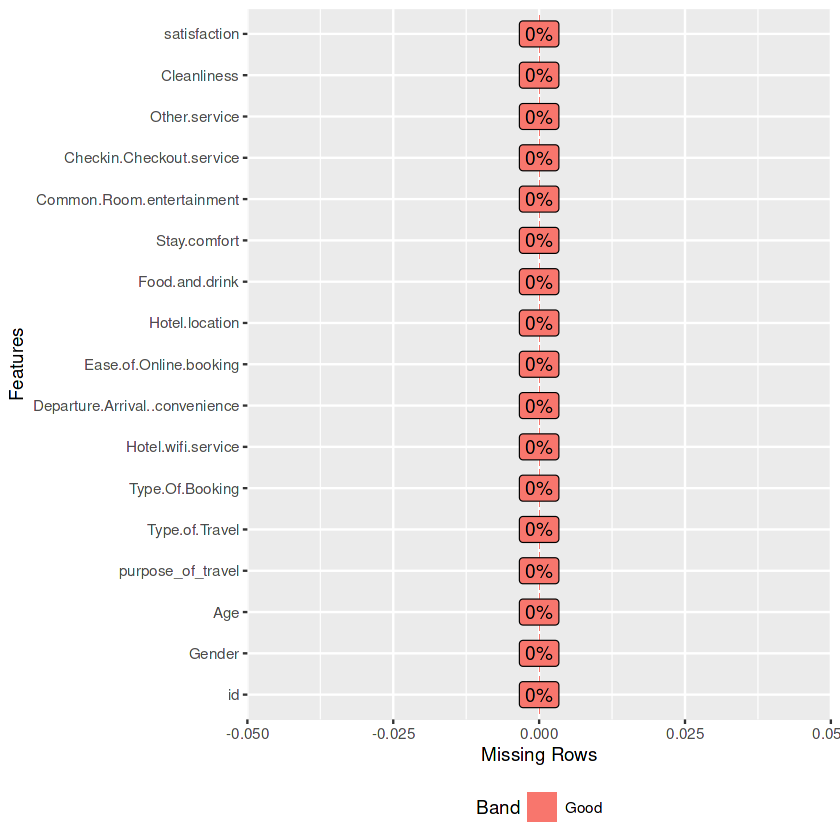

In [33]:
install.packages("DataExplorer")
library(DataExplorer)
#missing value plot
plot_missing(hotel_data)

Woho!! There are no missing values.

## Step 3: Check the correlation between variables

#### Using **cor()** function we can find the correlation.
#### **corrplot()** will plot the correlation

> Correlation can be performed on **Numeric** data only

In [34]:
# Correlation matrix
hotelcorr <- cor(hotel_data[, unlist(lapply(hotel_data, is.numeric))]) 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



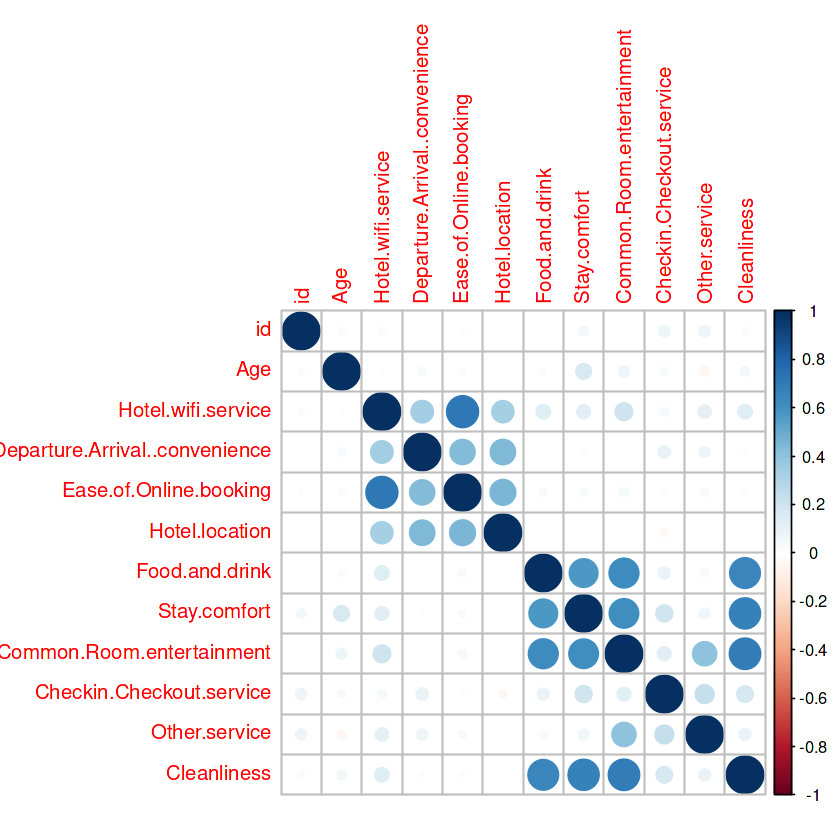

In [35]:
install.packages("corrplot")
library(corrplot)
corrplot(hotelcorr)

#### Note: **Darker the color higher the correlation**

#### The plot indicates **high correlation** between following variables-
#### • Hotel.wifi.service - Ease.of.Online.booking
#### • Cleanliness - Food.and.drink, Stay.comfort, Common.Room.entertainment
#### • Common.Room.entertainment - Food.and.drink, Stay.comfort

## Step 4: Eigen value calculation

In [36]:
# Creating a variable hotel1, which is hotel_data - the dependent variable id
hotel1 <- (hotel_data[, unlist(lapply(hotel_data, is.numeric))])[-1]

In [37]:
# Eigen value
ev = eigen(cor(hotel1))
ev

eigen() decomposition
$values
 [1] 3.1195677 2.3229862 1.2092234 1.0255424 0.8545620 0.7607969 0.5381988
 [8] 0.4012043 0.3035985 0.2584139 0.2059058

$vectors
             [,1]         [,2]        [,3]        [,4]       [,5]         [,6]
 [1,] -0.07233388  0.006706715  0.21428252  0.87773444 -0.3803411  0.066710299
 [2,] -0.22458818 -0.460569168  0.01190662 -0.09059066 -0.2355003 -0.490515384
 [3,] -0.10478708 -0.447638446 -0.06161452  0.13904017  0.2940397  0.422544325
 [4,] -0.14813181 -0.541726412  0.06186111 -0.03886963 -0.1187944 -0.344685159
 [5,] -0.08765069 -0.455848169  0.10688782 -0.02831418  0.1736476  0.512698621
 [6,] -0.43747449  0.145022568  0.21786965 -0.15365794  0.1060562  0.012328361
 [7,] -0.45018630  0.148313643  0.15408261  0.11268352  0.1192373 -0.005073104
 [8,] -0.48190831  0.128015575 -0.10134973 -0.10941245 -0.2703544  0.130504962
 [9,] -0.15489972  0.023618319 -0.54881073  0.37908729  0.5911480 -0.331986341
[10,] -0.16716542 -0.012802348 -0.73183116 -0.0651

#### Our dataset has 11 numeric variables, therefore 11 factors are created.
#### The Eigen value indicates the variance & is always presented in decreasing order.

eigen() decomposition

$values

 [1] **3.1195677 2.3229862 1.2092234 1.0255424** 0.8545620 0.7607969 0.5381988
 
 [8] 0.4012043 0.3035985 0.2584139 0.2059058
 
#### Here first four values have eigen values greater than 1, and therefore we have 4 factors.

## Step 5 : Scree plot

Screeplot helps in determining the optimal number of factors or components.

In [38]:
# Scree plot
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



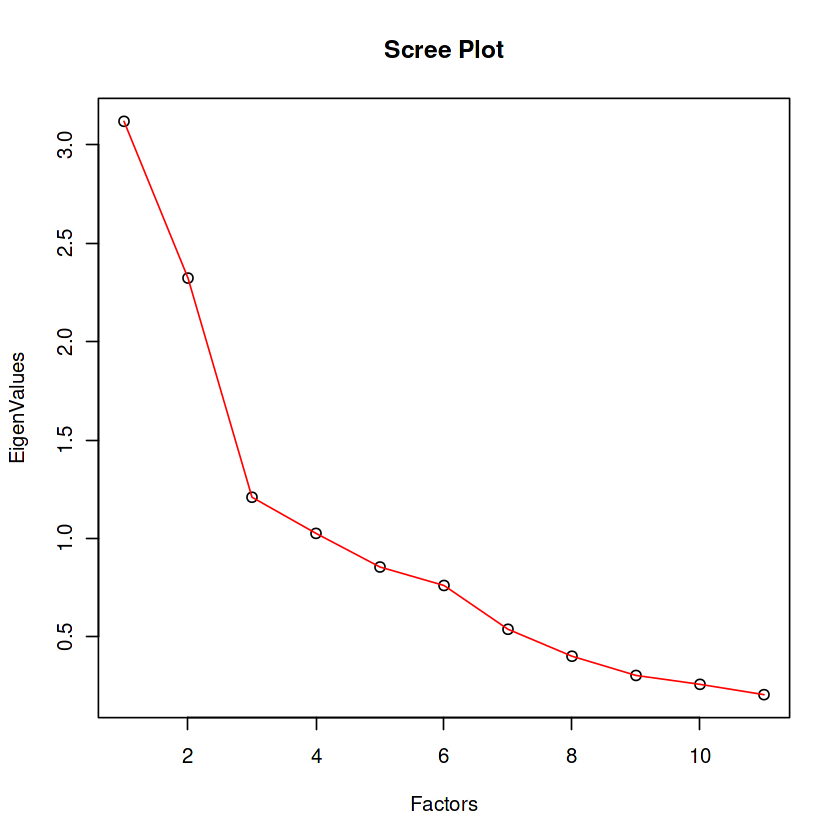

In [39]:
# Eigen values

EigenValues<- ev$values

# Listing of 11 factors
Factors=c(1,2,3,4,5,6,7,8,9,10,11)

#DataFrame with factors & Eigen values

Scree=data.frame(Factors, EigenValues)
plot(Scree, main="Scree Plot", col="black")
lines(Scree, col="red")

The eigen values & factors are plotted, the point where the "**elbow**" shape is formed is considered.

In this plot 3 is the point where elbow is formed.
Therefore, the number of factors is considered as 3, which is the same result that the eigen values indicates.

#### **Conclusion** - **from 11 variables, three factors can be derived.**

## Step 6: Unrotated factor matrix

In [40]:
# Factor analysis - unrotated
# Here principal() function is used and rotation is kept as 'none'

hotel_unrotated = principal(hotel1, nfactors = 3, rotate='none')
hotel_unrotated

Principal Components Analysis
Call: principal(r = hotel1, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                                PC1   PC2   PC3    h2   u2 com
Age                            0.13 -0.01 -0.24 0.072 0.93 1.5
Hotel.wifi.service             0.40  0.70 -0.01 0.650 0.35 1.6
Departure.Arrival..convenience 0.19  0.68  0.07 0.504 0.50 1.2
Ease.of.Online.booking         0.26  0.83 -0.07 0.755 0.25 1.2
Hotel.location                 0.15  0.69 -0.12 0.520 0.48 1.2
Food.and.drink                 0.77 -0.22 -0.24 0.703 0.30 1.4
Stay.comfort                   0.80 -0.23 -0.17 0.712 0.29 1.3
Common.Room.entertainment      0.85 -0.20  0.11 0.775 0.23 1.1
Checkin.Checkout.service       0.27 -0.04  0.60 0.440 0.56 1.4
Other.service                  0.30  0.02  0.80 0.735 0.26 1.3
Cleanliness                    0.84 -0.25 -0.14 0.784 0.22 1.2

                       PC1  PC2  PC3
SS loadings           3.12 2.32 1.21
Proportion 

#### Unrotated factor matrix identifies factors based on the maximum variance. 
#### The output is matrix showing correlation between variables and the factor.
#### PC1 , PC2, PC3 are three principal components.

## Step 7: Factor loadings

Based on the correlation the variables are loaded in factors as shown in table.
The variables with highest correlation get loaded into factor & it means the particular variable is representative of factor.

The variable *Age* has 0.13 correlation with PC1, which is highest among different components & therefore, gets loaded into PC1.
Similarly other variables.

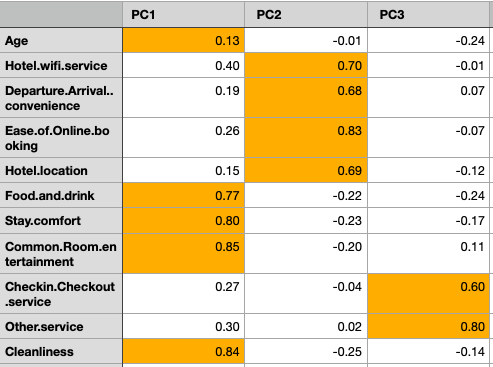

## Step 8: Communality

* Communality is represented by h2 values, which shows the variance of the variable captured by component.
*Hotel.wifi.service* has h2 value of 0.650 which means 65% of the variance of the variable *Hotel.wifi.service* is captured in the component PC1 to PC3.

* The **u2** values indicate the uniqueness of the variable(1-h2).

* **SS-loadings** indicate the sum of squared loadings, and a factor is considered good if the ss loading are greater than 1.

* The **proportion variance** of each component is explained in this part of output. PC1 has 28%, PC2 has 21% & PC3 has 11%

* The **cumulative variance** gives the total of all four components, which is in this case is 60%. This means 60% of the variance in the dataset is captured by the three components put together.


## Step 9: Rotated factor matrix

* In order to get more meaningful interpretation of the factors, the variables are rotated.
* In this notebook, we use varimax rotation, which is the most commonly used orthogonal rotation.
* As the name indicated, this method maximizes the variance between the factors.
* This drives all the lower correlation closer to zero & all the upper correlation closer to one. 

Principal Components Analysis
Call: principal(r = hotel1, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                 RC1  RC2   RC3    h2   u2 com
Age                             0.17 0.04 -0.20 0.072 0.93 2.0
Hotel.wifi.service              0.17 0.79  0.06 0.650 0.35 1.1
Departure.Arrival..convenience -0.04 0.70  0.09 0.504 0.50 1.0
Ease.of.Online.booking          0.02 0.87 -0.02 0.755 0.25 1.0
Hotel.location                 -0.03 0.71 -0.09 0.520 0.48 1.0
Food.and.drink                  0.84 0.02 -0.06 0.703 0.30 1.0
Stay.comfort                    0.84 0.02  0.01 0.712 0.29 1.0
Common.Room.entertainment       0.83 0.05  0.30 0.775 0.23 1.3
Checkin.Checkout.service        0.14 0.02  0.65 0.440 0.56 1.1
Other.service                   0.10 0.07  0.85 0.735 0.26 1.0
Cleanliness                     0.88 0.01  0.05 0.784 0.22 1.0

                       RC1  RC2  RC3
SS loadings           2.97 2.38 1.30
Proporti

[1] "-----------------------------------"


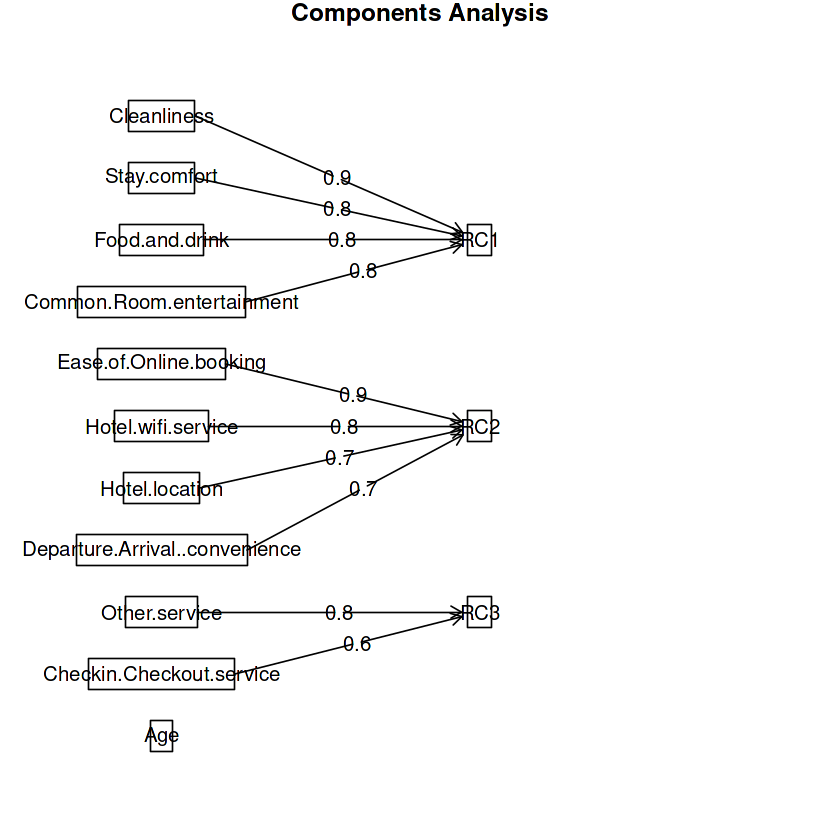

In [41]:
# varimax rotation
hotel_rotate = principal(hotel1, nfactors = 3, rotate = 'varimax')
hotel_rotate
print("-----------------------------------")
#The factor loading is also represented as a diagram using the fa.diagram().

fa.diagram(hotel_rotate)

In [42]:
View(hotel1)
# combining the factors with the dataset
hotel_new <- cbind(hotel_data[1], hotel_rotate$scores)

Age,Hotel.wifi.service,Departure.Arrival..convenience,Ease.of.Online.booking,Hotel.location,Food.and.drink,Stay.comfort,Common.Room.entertainment,Checkin.Checkout.service,Other.service,Cleanliness
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
13,3,4,3,1,5,5,5,4,5,5
25,3,2,3,3,1,1,1,1,4,1
26,2,2,2,2,5,5,5,4,4,5
25,2,5,5,5,2,2,2,1,4,2
61,3,3,3,3,4,5,3,3,3,3
26,3,4,2,1,1,1,1,4,4,1
47,2,4,2,3,2,2,2,3,5,2
52,4,3,4,4,5,5,5,4,5,4
41,1,2,2,2,4,3,1,4,1,2


## Step 10: Naming the factors

In [44]:
# Labeling the data
names(hotel_new)<-c("Hospitality","Services & location","Value added services","Age")
head(hotel_new)

,Hospitality,Services & location,Value added services,Age
,<int>,<dbl>,<dbl>,<dbl>
1,70172,1.2657059,-0.2594056,1.3772483
2,5047,-2.0621082,0.0340459,-0.3950408
3,110028,1.4053409,-0.9052579,0.5215384
4,24026,-1.3346615,1.3312610,-0.5727251
5,119299,0.5531287,0.1304099,-0.9596603
6,111157,-2.1226975,-0.3481922,1.0456354
